# Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know 
which variables are significant in predicting the price of a car
how well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.


# Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.


# Key components to be fulfilled

# 1. Loading and Preprocessing

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset
df=pd.read_csv("C:\\Users\\anjal\\Downloads\\CarPrice.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# check missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No null values in this dataset

In [9]:
# check duplicates
df.duplicated().sum()

0

No duplicate rows/columns

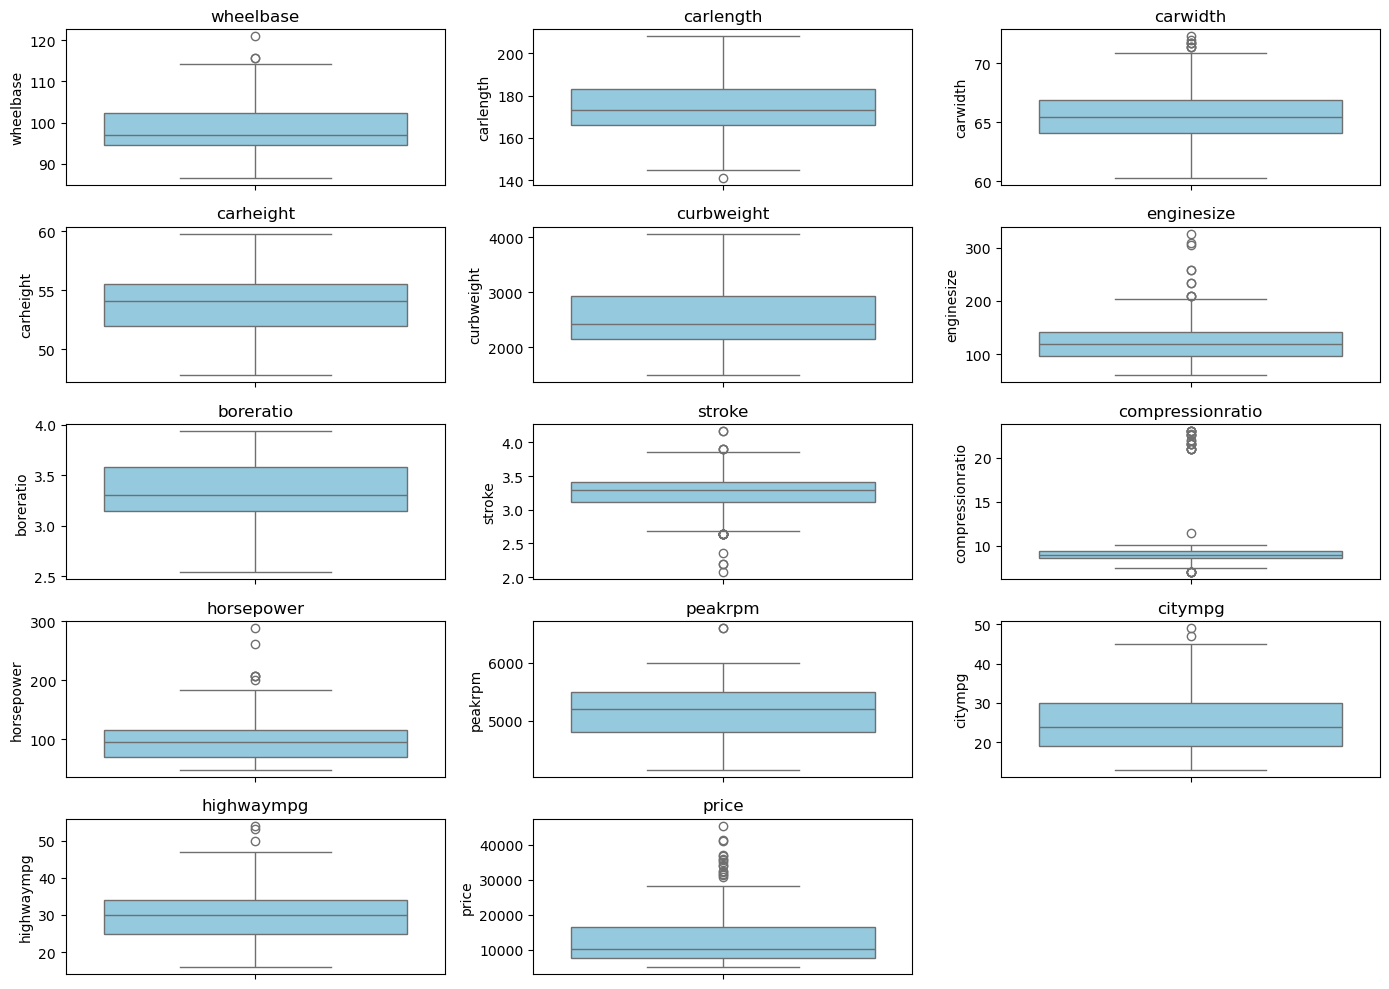

In [13]:
#checking outliers
numerical_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                  'enginesize', 'boreratio', 'stroke', 'compressionratio',
                  'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Visualizing Outliers using Box Plots
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [14]:
# Function to remove outliers using IQR
def outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [47]:
outlier_cols = ['compressionratio', 'horsepower', 'enginesize', 'price', 'citympg', 'highwaympg']
df = outliers(df, outlier_cols)


In [48]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0


In [49]:
# shape of dataset after removing outliers
df.shape

(135, 26)

In [50]:
#Encoding categorical data
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [54]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [55]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,0,0,1,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,0,0,1,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,0,1,2,2,0,94.5,...,152,3,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,0,0,0,3,1,0,99.8,...,109,3,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,0,0,0,3,0,0,99.4,...,136,3,3.19,3.40,8.0,115,5500,18,22,17450.0


In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [57]:
df_scaled.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.724619,1.870524,-1.762653,0.0,-0.196116,1.152209,-3.015866,1.542419,0.0,-1.961712,...,1.051990,1.087404,0.747377,-1.635150,-0.080936,0.968981,-0.473591,-1.063010,-0.994000,0.922842
1,-1.707963,1.870524,-1.726999,0.0,-0.196116,1.152209,-3.015866,1.542419,0.0,-1.961712,...,1.051990,1.087404,0.747377,-1.635150,-0.080936,0.968981,-0.473591,-1.063010,-0.994000,1.737712
2,-1.691308,0.116908,-1.798308,0.0,-0.196116,1.152209,-0.728552,1.542419,0.0,-0.648242,...,2.214777,1.087404,-2.344469,0.880556,-0.080936,2.920052,-0.473591,-1.457259,-1.189613,1.737712
3,-1.674653,0.993716,-1.691344,0.0,-0.196116,-0.867898,0.415105,-0.367916,0.0,0.531654,...,-0.057944,1.087404,-0.348467,0.657645,2.284076,0.560618,0.654006,-0.471638,-0.407163,1.046225
4,-1.657998,0.993716,-1.655690,0.0,-0.196116,-0.867898,0.415105,-2.278251,0.0,0.442605,...,1.369114,1.087404,-0.348467,0.657645,-2.445948,1.150476,0.654006,-1.654383,-1.972062,1.995325


In [59]:
# split dataset
x = df.drop(columns=['price'])  
y = df['price']  # target 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
x_train.shape

(108, 25)

#  2. Model Implementation

Implement the regression algorithms



In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


1. Linear regression

In [91]:
#model- object creation
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred= model.predict(x_test)
y_pred

array([ 6407.33347859, 16582.56811699,  6458.64887248,  6054.49592063,
       15261.05131202,  6045.97919728,  6771.46709067, 12726.7822178 ,
        9887.50843969,  9915.27700265,  9617.29326444, 11832.64156037,
        9109.06231389,  5611.31496186, 10356.85700759,  6369.64497113,
        6948.50528511, 15517.55713834,  7076.82609161, 13991.51966458,
        6929.02702678,  9147.03851155,  7302.53987588,  5707.13612567,
        7317.03085643, 12602.20245607,  9575.24074602])

In [93]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
152,6488.0,6407.333479
109,12440.0,16582.568117
162,9258.0,6458.648872
32,5399.0,6054.495921
58,15645.0,15261.051312
97,7999.0,6045.979197
21,5572.0,6771.467091
167,8449.0,12726.782218
189,11595.0,9887.508440
193,12290.0,9915.277003


In [68]:
model=DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [69]:
y_pred= model.predict(x_test)
y_pred

array([ 6338. , 15580. ,  8358. ,  5572. , 13295. ,  7499. ,  5572. ,
        9989. ,  9980. , 11245. , 10245. , 10945. ,  6989. ,  8495. ,
        9988. ,  8916.5,  6189. , 17710. ,  7799. , 12170. ,  7603. ,
        9095. ,  6692. ,  8916.5,  6575. ,  9989. ,  8845. ])

In [70]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
152,6488.0,6338.0
109,12440.0,15580.0
162,9258.0,8358.0
32,5399.0,5572.0
58,15645.0,13295.0
97,7999.0,7499.0
21,5572.0,5572.0
167,8449.0,9989.0
189,11595.0,9980.0
193,12290.0,11245.0


In [71]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [72]:
y_pred= model.predict(x_test)
y_pred

array([ 6686.11 , 14923.62 ,  8026.   ,  6027.225, 13392.86 ,  7477.17 ,
        5895.855, 10899.59 ,  9719.89 ,  9837.65 , 10114.14 , 11855.83 ,
        8561.21 ,  7855.91 , 10232.43 ,  7276.89 ,  6701.6  , 15875.   ,
        7249.805, 14094.86 ,  7598.73 ,  8711.6  ,  6675.355,  6576.84 ,
        6760.42 , 11036.52 ,  9387.19 ])

In [73]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
152,6488.0,6686.110
109,12440.0,14923.620
162,9258.0,8026.000
32,5399.0,6027.225
58,15645.0,13392.860
97,7999.0,7477.170
21,5572.0,5895.855
167,8449.0,10899.590
189,11595.0,9719.890
193,12290.0,9837.650


In [74]:
model=GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [75]:
y_pred= model.predict(x_test)
y_pred

array([ 6577.03874533, 15941.6654169 ,  7766.36802599,  6475.9215921 ,
       13586.42264243,  7498.847688  ,  5653.936677  , 11371.44545126,
       10393.88135224,  9745.40654568, 10109.25818702, 11448.48532282,
        7510.13569189,  7333.39803349, 10056.94497295,  7986.6440477 ,
        6620.21371795, 16285.07182868,  7307.49107843, 13370.37775258,
        7353.5433206 ,  8314.2588028 ,  6643.97791105,  6672.24618268,
        7268.10256344, 11371.44545126,  9430.27884935])

In [76]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
152,6488.0,6577.038745
109,12440.0,15941.665417
162,9258.0,7766.368026
32,5399.0,6475.921592
58,15645.0,13586.422642
97,7999.0,7498.847688
21,5572.0,5653.936677
167,8449.0,11371.445451
189,11595.0,10393.881352
193,12290.0,9745.406546


In [94]:
model=SVR()
model.fit(x_train,y_train)

SVR()

In [95]:
y_pred= model.predict(x_test)
y_pred

array([8947.97134592, 8950.22578123, 8948.19655238, 8947.93897648,
       8949.34859148, 8948.17189129, 8948.0091413 , 8948.92702598,
       8948.7004753 , 8949.26023024, 8948.68022224, 8949.13031873,
       8949.03225444, 8948.46399353, 8948.53665226, 8947.9632791 ,
       8948.23978813, 8949.72193077, 8948.07329493, 8949.50656155,
       8948.00892312, 8948.91035883, 8948.20970781, 8948.13663253,
       8947.9617961 , 8948.91972093, 8948.63513517])

In [96]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
152,6488.0,8947.971346
109,12440.0,8950.225781
162,9258.0,8948.196552
32,5399.0,8947.938976
58,15645.0,8949.348591
97,7999.0,8948.171891
21,5572.0,8948.009141
167,8449.0,8948.927026
189,11595.0,8948.700475
193,12290.0,8949.260230


# 3. Model Evaluation

Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).



R-squared (R²): Measures how well the model explains variance.
Mean Squared Error (MSE): Measures average squared errors.
Mean Absolute Error (MAE): Measures average absolute errors.

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}

results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,R² Score
Linear Regression,1488.680375,3.526006e+06,0.649213
Decision Tree,1039.259259,1.993965e+06,0.801629
Random Forest,1133.151481,1.939859e+06,0.807012
Gradient Boosting,1271.903301,2.485209e+06,0.752757
SVR,2480.887118,1.031187e+07,-0.025884


The model with the highest R2 and lowest MSE/MAE is considered the best. Here Random Forest Regressor is the best model. While the Decision Tree Regressor has the lowest MAE, the Random Forest Regressor has a better balance of R², MSE, and MAE, making it the most accurate and reliable model overall.

# 4. Feature Importance Analysis

The object of feature importance analysis is to identify the most influential variables affecting car prices.

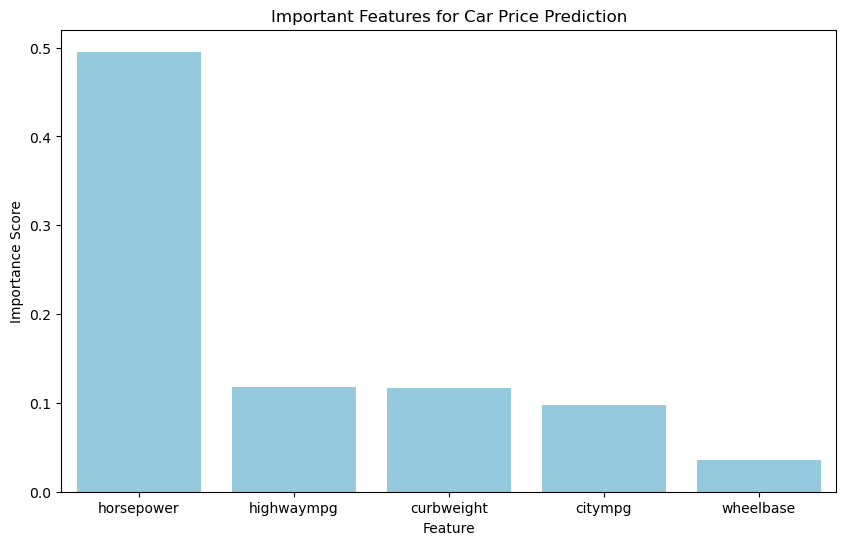

In [100]:
# feature importance from the best model (Random Forest)
best_model = models["Random Forest"]
feature_importance = best_model.feature_importances_

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({"Feature": x.columns, "Importance": feature_importance})

# Sort features by importance (Descending Order)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False).head() 

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Feature"],y=feature_importance_df["Importance"], color='skyblue')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Important Features for Car Price Prediction")
plt.show()




# 5. Hyperparameter Tuning
Objective of Hyperparameter Tuning is to improve model performance by tuning hyperparameters.


Perform hyperparameter tuning and check whether the performance of the model has increased.

1. GridSearch CV

In [101]:
from sklearn.model_selection import GridSearchCV

In [114]:
parameters = {
    'n_estimators': [100, 200, 300],
    'criterion' : ['absolute_error', 'squared_error'],
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

model = RandomForestRegressor()
grid_search=GridSearchCV(model,parameters,cv=5, scoring='r2',n_jobs=-1)

In [115]:
print(grid_search)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')


In [117]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [120]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(x_train, y_train)



Best Hyperparameters: {'criterion': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      n_estimators=200, random_state=42)

In [123]:
# Evaluate Performance
y_pred_best = best_rf_model.predict(x_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best,mse_best,r2_best


(1141.9257407407406, 2015663.3117296298, 0.7994703638180697)

In [125]:
rf_comparison = pd.DataFrame({
    "Metric": ["MAE", "MSE", "R² Score"],
    "Before Tuning": [results["Random Forest"]["MAE"], 
                      results["Random Forest"]["MSE"], 
                      results["Random Forest"]["R² Score"]],
    "After Tuning": [mae_best, mse_best, r2_best]  # Values after tuning
})
rf_comparison

,Metric,Before Tuning,After Tuning
0,MAE,1.133151e+03,1.141926e+03
1,MSE,1.939859e+06,2.015663e+06
2,R² Score,8.070119e-01,7.994704e-01


2. RandomizedSearch CV

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [127]:
parameters = {
    'n_estimators': randint(100, 500), 
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False],  
    'criterion': ['absolute_error', 'squared_error']
}

In [128]:
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=parameters,
    n_iter=20, 
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

In [129]:
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['absolute_error',
                                                      'squared_error'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002905B181A00>},
                   random_state=42, scoring='r2')

In [130]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(x_train, y_train)


Best Hyperparameters: {'criterion': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      n_estimators=200, random_state=42)

In [131]:
# Evaluate Performance
y_pred_best = best_rf_model.predict(x_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best,mse_best,r2_best

(1141.9257407407406, 2015663.3117296298, 0.7994703638180697)

In [132]:
rf_comparison = pd.DataFrame({
    "Metric": ["MAE", "MSE", "R² Score"],
    "Before Tuning": [results["Random Forest"]["MAE"], 
                      results["Random Forest"]["MSE"], 
                      results["Random Forest"]["R² Score"]],
    "After Tuning": [mae_best, mse_best, r2_best]  # Values after tuning
})
rf_comparison

,Metric,Before Tuning,After Tuning
0,MAE,1.133151e+03,1.141926e+03
1,MSE,1.939859e+06,2.015663e+06
2,R² Score,8.070119e-01,7.994704e-01


Key Observations:
MAE Increased Slightly,
MSE Increased,
R² Score Dropped Slightly 
The model explains slightly less variance in car prices after tuning.
Hyperparameter tuning did NOT improve the model's performance.

# Conclusion

This project successfully analyzed car pricing factors in the U.S. market using machine learning models and identified key variables that influence car prices. Through a comparative analysis of five regression models, the Random Forest Regressor was identified as the best-performing model, with an R² score of 0.807, meaning it explains approximately 80.7% of the variance in car prices. While hyperparameter tuning did not significantly improve model performance, the insights gained from feature importance analysis provided valuable business recommendations.

The findings revealed that engine size, horsepower, brand, car type, fuel efficiency, vehicle dimensions, and technology/safety features are the most influential factors affecting car prices. These insights are crucial for the Chinese automobile company as they plan to enter the U.S. market. Based on this analysis, a strategic market entry plan was proposed, focusing on SUVs and sedans, competitive pricing, flexible financing, and strong after-sales support.

End of the project....